<a href="https://colab.research.google.com/github/Ranakorn/DADS/blob/main/DADS5001/6610412003_Assignment2_Premier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [ ]:
df = pd.read_csv(r"D:\PandasAs\2021-2022.csv")
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


# Q : ทีมใดได้รับใบเหลือง และใบแดง รวมกันมากที่สุด และเป็นจำนวนเท่าใด
# A : Leeds ได้รับใบเหลืองและใบแดงรวมกันมากที่สุดจำนวน 93 ใบ

In [ ]:
#เรียงลำดับการได้รับใบแดง และ ใบเหลือง ของแต่ละทีม
df['TotalGetCard'] = df['HY'] + df['AY'] + df['HR'] + df['AR']
result = df.groupby(['HomeTeam']).agg({
    'HY': 'sum',
    'AY': 'sum',
    'HR': 'sum',
    'AR': 'sum',
    'TotalGetCard':'sum'
})
result.sort_values('TotalGetCard',ascending=False)

,HY,AY,HR,AR,TotalGetCard
HomeTeam,,,,,
Leeds,53,38,2,0,93
Everton,41,41,5,0,87
Wolves,31,48,1,2,82
Crystal Palace,34,42,0,2,78
Tottenham,34,39,0,3,76
Chelsea,32,40,0,3,75
Newcastle,34,36,1,1,72
Aston Villa,31,37,2,1,71
Arsenal,31,35,1,3,70


# Q : แล้วกรรมการคนไหน คือ ตัวตึงในการแจกใบเหลือง ใบแดง?
# A : กรรมการ 3 ตัวตึง ก็ คือ..
# .. MR.C Pawson ..  ท่านแจกไปถึง 109 ใบ
# .. MR.P Tierney ..  ท่านแจกไปถึง 108 ใบ
# .. MR.A Taylor ..  ท่านแจกไปถึง 106 ใบ
# (โหดสั..รัสเซีย)!!@#! o_O"

In [ ]:
just = df[['Referee','HY','AY','HR','AR']].groupby('Referee').sum()
just['TotalCard'] = just['HY'] + just['AY'] + just['HR'] + just['AR']
just.sort_values('TotalCard' , ascending=False)

,HY,AY,HR,AR,TotalCard
Referee,,,,,
C Pawson,51,56,2,0,109
P Tierney,54,49,1,4,108
A Taylor,50,51,3,2,106
D Coote,43,47,1,1,92
M Dean,43,39,2,0,84
M Oliver,36,37,3,4,80
K Friend,41,36,1,1,79
C Kavanagh,30,38,2,1,71
S Attwell,33,37,1,0,71


# Q: หาค่าสัมประสิทธิ์สหสัมพันธ์  3 อันดับแรก ที่ส่งผลต่อการทำประตูของแต่ละทีม
# A: ปัจจัยการทำประตู จาก Correlation Coefficient
# กรณีทีมเหย้าคือ  HTHG = 0.7, HST  = 0.64 , HS = 0.4
# ปัจจัยการทำประตูกรณีทีมเยือนคือ  HTAG = 0.72, AST  = 0.65 , AS = 0.42

In [ ]:
#แสดงสัมประสิทธิ์สหสัมพันธ์ ของแต่ละปัจจัย 3 อันดับแรก ในการทำประตู
stats = df.loc[:, 'HomeTeam':'AR']
correlation_matrix = stats.corr(numeric_only=True)
top3 = correlation_matrix.apply(lambda x: pd.Series({'top_correlations': x.nlargest(4).index, 'values': x.nlargest(4).values.round(2)}))
top3[['FTHG','FTAG']]

,FTHG,FTAG
top_correlations,"Index(['FTHG', 'HTHG', 'HST', 'HS'], dtype='ob...","Index(['FTAG', 'HTAG', 'AST', 'AS'], dtype='ob..."
values,"[1.0, 0.7, 0.64, 0.4]","[1.0, 0.72, 0.65, 0.42]"


# Q: ทีมใดมีอัตราการชนะมากที่สุด และคิดเป็นกี่เปอเซ็น
# A: แน่นอนต้อง Man City สิ! มีอัตราการชนะมากสุด คิดเป็น 76.32%

In [ ]:
#การทำประตูกรณีชนะ(ทีมเหย้า,ทีมเยือน) , จำนวนการชนะ และอัตราการชนะของแต่ละทีม
homeWin = df[df['FTR'] == 'H'][['HomeTeam', 'FTHG']].groupby('HomeTeam').sum()
awayWin = df[df['FTR'] == 'A'][['AwayTeam', 'FTAG']].groupby('AwayTeam').sum()
countHomeWin = df[df['FTR'] == 'H'][['HomeTeam', 'FTHG']].groupby('HomeTeam').count()
countAwayWin = df[df['FTR'] == 'A'][['AwayTeam', 'FTAG']].groupby('AwayTeam').count()
countWin = countHomeWin['FTHG'] + countAwayWin['FTAG']

winRateDataFrame = pd.DataFrame(data={
    'FTHG': homeWin['FTHG'],
    'FTAG': awayWin['FTAG'],
    'TotalGoals': homeWin['FTHG'] + awayWin['FTAG'],
    'TotalWins' : countWin,
    "WinRate(%)" : ((countWin / 38) * 100).round(2)
}).sort_values('TotalWins', ascending=False)

winRateDataFrame

,FTHG,FTAG,TotalGoals,TotalWins,WinRate(%)
Man City,54,36,90,29,76.32
Liverpool,43,34,77,28,73.68
Tottenham,34,26,60,22,57.89
Arsenal,31,23,54,22,57.89
Chelsea,25,34,59,21,55.26
Man United,28,14,42,16,42.11
West Ham,19,22,41,16,42.11
Wolves,16,13,29,15,39.47
Leicester,26,11,37,14,36.84
Aston Villa,15,14,29,13,34.21


# Q: Man U ลงแข่ง แล้วไม่ชนะ เป็นไปได้หรอ O_o"?
# A: เป็นได้สิ จากการคำนวณ population proportion สัดส่วนของ Man United ลงแข่งแต่ไม่ชนะ อยู่ในช่วง 0.42 ถึง 0.74 ด้วยระดับความเชื่อมั่น 95%   

![Alternative Text](https://phantran.net/wp-content/uploads/2021/08/4-67.png)

สัดส่วนของ Man United ลงแข่งแต่ไม่ชนะ อยู่ในช่วง 0.42 ถึง 0.74 ด้วยระดับความเชื่อมั่น 95%


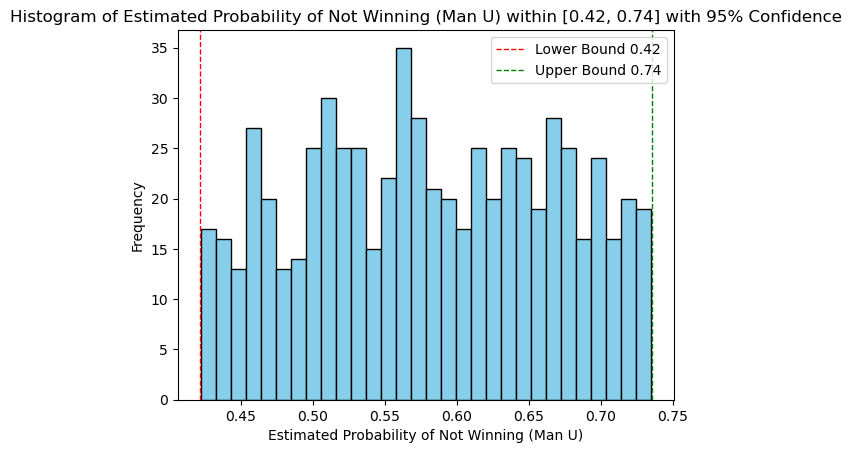

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR
51,25/09/2021,12:30,Man United,Aston Villa,0,1,A
60,02/10/2021,12:30,Man United,Everton,1,1,D
89,24/10/2021,16:30,Man United,Liverpool,0,5,A
101,06/11/2021,12:30,Man United,Man City,0,2,A
190,03/01/2022,17:30,Man United,Wolves,0,1,A
224,12/02/2022,12:30,Man United,Southampton,1,1,D
252,26/02/2022,15:00,Man United,Watford,0,0,D
294,02/04/2022,17:30,Man United,Leicester,1,1,D
331,28/04/2022,19:45,Man United,Chelsea,1,1,D
16,22/08/2021,14:00,Southampton,Man United,1,1,D


In [ ]:
#จำนวนที่ Man United ลงแข่ง แต่ไม่ชนะ
p1 = df[(df['FTR'] != 'H') & (df['HomeTeam'] == 'Man United')][['HomeTeam', 'FTR']]
p2 = df[(df['FTR'] != 'A') & (df['AwayTeam'] == 'Man United')][['AwayTeam', 'FTR']]
p = p1['HomeTeam'].count() + p2['AwayTeam'].count()

#จำนวนการแข่งขันทั้งหมดของ Man United
n1 = df[(df['HomeTeam'] == 'Man United')][['HomeTeam']]
n2 = df[(df['AwayTeam'] == 'Man United')][['AwayTeam']]
n = n1['HomeTeam'].count()+n2['AwayTeam'].count()
pHat = p/n # ความน่าจะเป็นที่ทีม Man U จะไม่ชนะ (Loss or Draw) คือ 22/38 (10 แพ้ + 10 เสมอ)
confidence_level = 0.95 #ระดับความเชื่อมั่น
alpha = 1 - confidence_level
z = norm.ppf(1 - (alpha / 2)) # หาค่า Z
moe = z * math.sqrt((pHat * (1 - pHat)) / n) #หา Margin of Error = z * sqrt((p_hat * (1 - p_hat)) / n)

# ดังนั้น สัดส่วนของ Man United ลงแข่งแต่ไม่ชนะ อยู่ในช่วง p_hat - moe ถึง p_hat + moe ด้วยระดับความเชื่อมั่น 95%
L = pHat - moe
U = pHat + moe
print(f"สัดส่วนของ Man United ลงแข่งแต่ไม่ชนะ อยู่ในช่วง {L:.2f} ถึง {U:.2f} ด้วยระดับความเชื่อมั่น 95%")

# กราฟ
# สร้างข้อมูลสำหรับ Histogram
center_loc = (L + U) / 2
data = np.random.normal(loc=center_loc, scale=moe, size=1000)
filtered_data = data[(data >= L) & (data <= U)]

# สร้าง Histogram
plt.hist(filtered_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Estimated Probability of Not Winning (Man U)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Estimated Probability of Not Winning (Man U) within [{L:.2f}, {U:.2f}] with 95% Confidence')
plt.axvline(L, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound {L:.2f}')
plt.axvline(U, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound {U:.2f}')
plt.legend()
plt.show()

manUH = df[(df['FTR'] != 'H') & (df['HomeTeam'] == 'Man United')]
manUA = df[(df['FTR'] != 'A') & (df['AwayTeam'] == 'Man United')]
manUMatch = pd.concat([manUH, manUA]).iloc[:,1:8]
manUMatch